# Pridicting apartments living spaces in germany with linear regression

## Uploading data

In [ ]:
#for access to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls 'drive/MyDrive/kaggle'

kaggle.json


In [ ]:
#using kaggle api and adding kaggle folder to os enviromental path
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [ ]:
#downloading apartment-rental-offers-in-germany from kaggle
!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

 90% 84.0M/93.0M [00:00<00:00, 80.5MB/s]
100% 93.0M/93.0M [00:01<00:00, 95.7MB/s]


In [ ]:
#unzipping file
!unzip apartment-rental-offers-in-germany.zip

Archive:  apartment-rental-offers-in-germany.zip
  inflating: immo_data.csv           


In [ ]:
!ls

apartment-rental-offers-in-germany.zip	drive  immo_data.csv  sample_data


In [ ]:
#importing libraries
import pandas as pd #for working with data and data processing
import numpy as np #linear algebra
import matplotlib.pyplot as plt #for plots
%matplotlib inline
import seaborn as sns #for plots 

In [ ]:
#reading data
house_df = pd.read_csv('immo_data.csv')

In [ ]:
#see the five first rows
house_df.head

<bound method NDFrame.head of                      regio1  serviceCharge  ... electricityKwhPrice   date
0       Nordrhein_Westfalen         245.00  ...                 NaN  May19
1           Rheinland_Pfalz         134.00  ...                 NaN  May19
2                   Sachsen         255.00  ...                 NaN  Oct19
3                   Sachsen          58.15  ...                 NaN  May19
4                    Bremen         138.00  ...                 NaN  Feb20
...                     ...            ...  ...                 ...    ...
268845               Bayern          90.00  ...                 NaN  Feb20
268846               Hessen         220.00  ...                 NaN  May19
268847               Hessen         220.00  ...                 NaN  Feb20
268848  Nordrhein_Westfalen         175.00  ...                 NaN  May19
268849               Hessen         315.00  ...                 NaN  Feb20

[268850 rows x 49 columns]>

In [ ]:
#using set option to see better
pd.set_option('display.max_columns', None)
house_df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


## Data preprocessing

In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [ ]:
#how many nulls in each column(independent variabl)
house_df.isna().sum()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

In [ ]:
house_df.shape

(268850, 49)

In [ ]:
house_df.dropna().head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
9226,Hessen,38.78,district_heating,ONE_YEAR_FREE,10.0,False,True,7,6.90,2.4,906.41,2016.0,107012596,1.0,district_heating,True,Hessen,True,9.0,777.15,24,51.81,Frankfurt_am_Main,mint_condition,sophisticated,yes,Gundelandstr.,Gundelandstr.,True,5,apartment,60435,2.0,22.45,4.0,5.0,2,True,2,Frankfurt_am_Main,Preungesheim,Hell und luftig präsentiert sich der fünfgesch...,Neben der attraktiven Optik überzeugen auch d...,90.48,A_PLUS,2016.0,90.76,0.1985,Sep18
33285,Nordrhein_Westfalen,60.00,self_contained_central_heating,ONE_YEAR_FREE,10.0,False,True,9,3.51,2.4,595.00,1994.0,105736268,2.0,gas,True,Nordrhein_Westfalen,True,5.0,455.00,3,80.00,Steinfurt_Kreis,well_kept,normal,no,H&ouml;ls Kamp,Höls_Kamp,False,3,roof_storey,48477,3.0,143.10,2.0,2.0,3,False,3,Steinfurt_Kreis,Hörstel,"Diese freundliche, gepflegte DG-Wohnung im zwe...",Satellitenanschluß wird gestellt. Eine Garage ...,80.00,NO_INFORMATION,2012.0,90.76,0.1915,Sep18
60721,Nordrhein_Westfalen,80.00,central_heating,ONE_YEAR_FREE,10.0,False,False,16,1.67,10.0,605.00,1927.0,84878217,1.0,gas,False,Nordrhein_Westfalen,True,1.0,440.00,41,70.00,Ennepe_Ruhr_Kreis,well_kept,normal,negotiable,Osterfeldstr.,Osterfeldstr.,False,3,roof_storey,58300,3.5,184.00,2.0,2.0,3,True,3,Ennepe_Ruhr_Kreis,Wetter_Ruhr,Wir bieten Ihnen hier eine im Jahr 2016 modern...,Die Wohnung wurde 2016 komplett modernisiert (...,85.00,F,2016.0,90.76,0.1915,Sep18
63645,Schleswig_Holstein,95.00,central_heating,ONE_YEAR_FREE,10.0,False,True,1,4.49,2.4,858.85,1980.0,104165826,1.0,district_heating,True,Schleswig_Holstein,True,3.0,688.85,1,72.51,Segeberg_Kreis,modernized,normal,no,Alter Kirchenweg,Alter_Kirchenweg,True,5,raised_ground_floor,22844,3.0,90.00,3.0,7.0,3,False,3,Segeberg_Kreis,Norderstedt,Ansprechendes Mehrfamilienhaus an der Kreuzung...,"3 Zimmer, Vollbad, Einbauküche, Balkon, Dachbo...",75.00,C,2015.0,90.76,0.1915,Sep18
75928,Brandenburg,45.00,central_heating,ONE_YEAR_FREE,10.0,False,False,9,2.08,2.4,395.00,1976.0,81434647,0.0,gas,False,Brandenburg,True,3.0,290.00,13,59.40,Prignitz_Kreis,well_kept,normal,negotiable,Am Waldeck,Am_Waldeck,False,1,apartment,19339,3.0,82.80,2.0,2.0,3,True,2,Prignitz_Kreis,Plattenburg,"Sie wohnen in einem Haus mit 6 gleich großen, ...",Die Wohnungsbilder sind nur Ausstattungsbeispi...,60.00,C,1997.0,90.76,0.2265,Sep18


In [ ]:
#looking at categorical columns and finding out the cardinality of each categorical variable
mask = house_df.dtypes == object
categorical_cols = house_df.columns[mask]
categorical_cols

Index(['regio1', 'heatingType', 'telekomTvOffer', 'firingTypes', 'geo_bln',
       'houseNumber', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'typeOfFlat', 'regio2', 'regio3',
       'description', 'facilities', 'energyEfficiencyClass', 'date'],
      dtype='object')

In [ ]:
house_df[categorical_cols].nunique()

regio1                       16
heatingType                  13
telekomTvOffer                3
firingTypes                 132
geo_bln                      16
houseNumber                5510
geo_krs                     419
condition                    10
interiorQual                  4
petsAllowed                   3
street                    52373
streetPlain               54490
typeOfFlat                   10
regio2                      419
regio3                     8684
description              212621
facilities               189526
energyEfficiencyClass        10
date                          4
dtype: int64

In [ ]:
house_df[categorical_cols].dropna().head()

,regio1,heatingType,telekomTvOffer,firingTypes,geo_bln,houseNumber,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,typeOfFlat,regio2,regio3,description,facilities,energyEfficiencyClass,date
24,Hamburg,central_heating,ONE_YEAR_FREE,district_heating,Hamburg,14,Hamburg,fully_renovated,normal,negotiable,B&ouml;melburgweg,Bömelburgweg,apartment,Hamburg,Horn,Freuen Sie sich auf diese grundsanierte Wohnun...,Kabelanschluss; Warmwasser zentral (über Heiza...,E,May19
52,Sachsen,gas_heating,ONE_YEAR_FREE,gas,Sachsen,14,Zwickau_Kreis,well_kept,normal,negotiable,Friedrich Engels Stra&szlig;e,Friedrich_Engels_Straße,other,Zwickau_Kreis,Hohenstein_Ernstthal, Laminatboden in den Wohn-und Schlafräumen\n...,"Zur Vermietung steht hier im 1. Obergeschoß, i...",D,Feb20
59,Sachsen,central_heating,ONE_YEAR_FREE,gas,Sachsen,21,Chemnitz,well_kept,normal,negotiable,Stadlerstra&szlig;e,Stadlerstraße_,apartment,Chemnitz,Bernsdorf,Helle 2 - Raum - Wohnung in einem kernsanierte...,- ansprechende Badausstattung mit Dusche\n- Ei...,E,Feb20
87,Berlin,district_heating,ONE_YEAR_FREE,district_heating,Berlin,19,Berlin,first_time_use,sophisticated,negotiable,Heidestra&szlig;e,Heidestraße,ground_floor,Berlin,Tiergarten_Tiergarten,"In the """"Wasserstadt - Mitte"""" you can expect ...",Your spacious ground floor apartment is equipp...,B,Feb20
95,Mecklenburg_Vorpommern,district_heating,ONE_YEAR_FREE,district_heating,Mecklenburg_Vorpommern,7,Nordvorpommern_Kreis,well_kept,normal,no,Danziger Stra&szlig;e,Danziger_Straße,apartment,Nordvorpommern_Kreis,Ribnitz_Damgarten,Wohngebiet in Plattenbauweise westlich vom Sta...,"- Bad mit Waschbecken, WC und Badewanne (teilw...",C,Oct19


In [ ]:
house_df.dropna(how = 'any').shape

(33, 49)

In [ ]:
house_df.isna().sum() / len(house_df)

regio1                      0.000000
serviceCharge               0.025698
heatingType                 0.166844
telekomTvOffer              0.121328
telekomHybridUploadSpeed    0.832546
newlyConst                  0.000000
balcony                     0.000000
picturecount                0.000000
pricetrend                  0.006814
telekomUploadSpeed          0.124077
totalRent                   0.150705
yearConstructed             0.212182
scoutId                     0.000000
noParkSpaces                0.653889
firingTypes                 0.211880
hasKitchen                  0.000000
geo_bln                     0.000000
cellar                      0.000000
yearConstructedRange        0.212182
baseRent                    0.000000
houseNumber                 0.264155
livingSpace                 0.000000
geo_krs                     0.000000
condition                   0.254748
interiorQual                0.419063
petsAllowed                 0.426160
street                      0.000000
s

In [ ]:
#deleting all columns with more than 0.5 N/As
house_df.drop(columns=house_df.columns[((house_df.isna().sum()/len(house_df)) > 0.50)], inplace=True)
house_df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'firingTypes', 'hasKitchen', 'geo_bln', 'cellar',
       'yearConstructedRange', 'baseRent', 'houseNumber', 'livingSpace',
       'geo_krs', 'condition', 'interiorQual', 'petsAllowed', 'street',
       'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat', 'geo_plz',
       'noRooms', 'thermalChar', 'floor', 'numberOfFloors', 'noRoomsRange',
       'garden', 'livingSpaceRange', 'regio2', 'regio3', 'description',
       'facilities', 'date'],
      dtype='object')

In [ ]:
house_df.shape

(268850, 42)

In [ ]:
mask = house_df.dtypes == object
categorical_cols = house_df.columns[mask]
categorical_cols

Index(['regio1', 'heatingType', 'telekomTvOffer', 'firingTypes', 'geo_bln',
       'houseNumber', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'typeOfFlat', 'regio2', 'regio3',
       'description', 'facilities', 'date'],
      dtype='object')

In [ ]:
house_df[categorical_cols].nunique()

regio1                16
heatingType           13
telekomTvOffer         3
firingTypes          132
geo_bln               16
houseNumber         5510
geo_krs              419
condition             10
interiorQual           4
petsAllowed            3
street             52373
streetPlain        54490
typeOfFlat            10
regio2               419
regio3              8684
description       212621
facilities        189526
date                   4
dtype: int64

In [ ]:
house_df[categorical_cols].dropna().head()

,regio1,heatingType,telekomTvOffer,firingTypes,geo_bln,houseNumber,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,typeOfFlat,regio2,regio3,description,facilities,date
9,Nordrhein_Westfalen,self_contained_central_heating,ONE_YEAR_FREE,gas,Nordrhein_Westfalen,30,Gelsenkirchen,well_kept,normal,negotiable,H&uuml;ttenstr.,Hüttenstr.,apartment,Gelsenkirchen,Bulmke_Hüllen,Sie sind auf der Suche nach einer gepflegten u...,In Ihrem neuen Zuhause können Sie nach wenigen...,Oct19
14,Nordrhein_Westfalen,gas_heating,ONE_YEAR_FREE,gas,Nordrhein_Westfalen,4,Dortmund,first_time_use,sophisticated,negotiable,Am Dimberg,Am_Dimberg,ground_floor,Dortmund,Kirchhörde,Der attraktive Neubau mit 10 Wohnungen liegt i...,"Fußbodenheizung, hochwertiger Bodenbelag Parke...",May19
19,Niedersachsen,district_heating,ONE_YEAR_FREE,district_heating,Niedersachsen,3,Göttingen_Kreis,mint_condition,sophisticated,negotiable,Robert-Gernhardt-Platz,Robert-Gernhardt-Platz,apartment,Göttingen_Kreis,Göttingen,Im Südgebäude des Quartiers am Leinebogen ents...,Moderne Architektur gepaart mit hochwertigen M...,Oct19
24,Hamburg,central_heating,ONE_YEAR_FREE,district_heating,Hamburg,14,Hamburg,fully_renovated,normal,negotiable,B&ouml;melburgweg,Bömelburgweg,apartment,Hamburg,Horn,Freuen Sie sich auf diese grundsanierte Wohnun...,Kabelanschluss; Warmwasser zentral (über Heiza...,May19
39,Sachsen,central_heating,ONE_YEAR_FREE,district_heating,Sachsen,38,Meißen_Kreis,well_kept,normal,negotiable,Schillerstra&szlig;e,Schillerstraße,ground_floor,Meißen_Kreis,Riesa,Im Erdgeschoss wird Ihnen diese 2 Zimmerwohnun...,In den hellen Wohnräumen ist ein PVC Fußboden ...,Feb20


In [ ]:
#deleting columns without any usefull information to our model
house_df.drop(columns=['houseNumber', 'street', 'streetPlain', 'description', 'facilities', 'date'], inplace=True)
house_df.shape

(268850, 36)

In [ ]:
mask = house_df.dtypes == object
categorical_cols = house_df.columns[mask]
house_df[categorical_cols].nunique()

regio1              16
heatingType         13
telekomTvOffer       3
firingTypes        132
geo_bln             16
geo_krs            419
condition           10
interiorQual         4
petsAllowed          3
typeOfFlat          10
regio2             419
regio3            8684
dtype: int64

## working with geographical data

installing opencage api to get lng and lnt of locations

In [ ]:
% pip install opencage

     |████████████████████████████████| 61kB 4.5MB/s 
     |████████████████████████████████| 3.2MB 12.5MB/s 


In [ ]:
from opencage.geocoder import OpenCageGeocode
key = '6893915cf51347508d4a6d8ed8349361'
geocoder = OpenCageGeocode(key)

In [ ]:
house_df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,livingSpace,geo_krs,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,1965.0,96107057,oil,False,Nordrhein_Westfalen,True,2.0,595.0,86.00,Dortmund,well_kept,normal,NaN,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,NaN,1871.0,111378734,gas,False,Rheinland_Pfalz,False,1.0,800.0,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,2019.0,113147523,NaN,False,Sachsen,True,9.0,965.0,83.80,Dresden,first_time_use,sophisticated,NaN,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,NaN,1964.0,108890903,district_heating,False,Sachsen,False,2.0,343.0,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,gas,False,Bremen,False,1.0,765.0,84.97,Bremen,refurbished,NaN,NaN,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen


In [ ]:
query = 'Sachsen'+' , '+'germany'  
results = geocoder.geocode(query)

lat = results[0]['geometry']['lat']
lng = results[0]['geometry']['lng']
print(lat,lng)
results

50.9295798 13.4585052


[{'annotations': {'DMS': {'lat': "50° 55' 46.48728'' N",
    'lng': "13° 27' 30.61872'' E"},
   'MGRS': '33UUS9167243125',
   'Maidenhead': 'JO60rw53ac',
   'Mercator': {'x': 1498193.946, 'y': 6575652.677},
   'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?relation=62467#map=16/50.92958/13.45851',
    'note_url': 'https://www.openstreetmap.org/note/new#map=16/50.92958/13.45851&layers=N',
    'url': 'https://www.openstreetmap.org/?mlat=50.92958&mlon=13.45851#map=16/50.92958/13.45851'},
   'UN_M49': {'regions': {'DE': '276',
     'EUROPE': '150',
     'WESTERN_EUROPE': '155',
     'WORLD': '001'},
    'statistical_groupings': ['MEDC']},
   'callingcode': 49,
   'currency': {'alternate_symbols': [],
    'decimal_mark': ',',
    'html_entity': '&#x20AC;',
    'iso_code': 'EUR',
    'iso_numeric': '978',
    'name': 'Euro',
    'smallest_denomination': 1,
    'subunit': 'Cent',
    'subunit_to_unit': 100,
    'symbol': '€',
    'symbol_first': 0,
    'thousands_separator': '.'},
  

In [ ]:
house_df.shape

(268850, 36)

## working without loactions

at first we look at our data without geographical data and fit our model based on those, the compare the model to the next model that will be implemented using geographical data therefore we choose the best one out of those two

In [ ]:
house_df_wo_location = house_df

In [ ]:
'livingSpace' in house_df_wo_location.columns

True

In [ ]:
mask_1 = house_df_wo_location.dtypes == object
categorical_cols = house_df_wo_location.columns[mask_1]
house_df_wo_location[categorical_cols].nunique()

regio1              16
heatingType         13
telekomTvOffer       3
firingTypes        132
geo_bln             16
geo_krs            419
condition           10
interiorQual         4
petsAllowed          3
typeOfFlat          10
regio2             419
regio3            8684
dtype: int64

In [ ]:
#drop all geographical data execpt regio1
house_df_wo_location.drop(columns=['geo_bln', 'geo_krs', 'regio2', 'regio3'], inplace=True)
house_df_wo_location.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,1965.0,96107057,oil,False,True,2.0,595.0,86.00,well_kept,normal,NaN,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,NaN,1871.0,111378734,gas,False,False,1.0,800.0,89.00,refurbished,normal,no,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,2019.0,113147523,NaN,False,True,9.0,965.0,83.80,first_time_use,sophisticated,NaN,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,NaN,1964.0,108890903,district_heating,False,False,2.0,343.0,58.15,NaN,NaN,NaN,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,gas,False,False,1.0,765.0,84.97,refurbished,NaN,NaN,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4


In [ ]:
house_df_wo_location.isna().sum()

regio1                       0
serviceCharge             6909
heatingType              44856
telekomTvOffer           32619
newlyConst                   0
balcony                      0
picturecount                 0
pricetrend                1832
telekomUploadSpeed       33358
totalRent                40517
yearConstructed          57045
scoutId                      0
firingTypes              56964
hasKitchen                   0
cellar                       0
yearConstructedRange     57045
baseRent                     0
livingSpace                  0
condition                68489
interiorQual            112665
petsAllowed             114573
lift                         0
baseRentRange                0
typeOfFlat               36614
geo_plz                      0
noRooms                      0
thermalChar             106506
floor                    51309
numberOfFloors           97732
noRoomsRange                 0
garden                       0
livingSpaceRange             0
dtype: i

In [ ]:
house_df_wo_location.shape

(268850, 32)

In [ ]:
house_df_wo_location.describe()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange
count,261941.000000,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,211805.000000,2.688500e+05,268850.000000,268850.000000,268850.000000,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000
mean,151.206113,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,3.714544,6.941294e+02,74.355548,3.765256,37283.022235,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790
std,308.295790,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,2.738134,1.953602e+04,254.759208,2.214357,27798.037296,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127
min,0.000000,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,1.000000,0.000000e+00,0.000000,1.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000
25%,95.000000,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,3.380000e+02,54.000000,2.000000,9128.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000
50%,135.000000,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,3.000000,4.900000e+02,67.320000,3.000000,38667.000000,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000
75%,190.000000,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,5.000000,7.990000e+02,87.000000,5.000000,57072.000000,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000
max,146118.000000,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,9.000000,9.999999e+06,111111.000000,9.000000,99998.000000,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000


we didn't delet region 1 because of low cardinality

## filling N/As

In [ ]:
house_df_wo_location.fillna(house_df_wo_location._get_numeric_data().mean(),inplace = True)

In [ ]:
house_df_wo_location.isna().sum()

regio1                       0
serviceCharge                0
heatingType              44856
telekomTvOffer           32619
newlyConst                   0
balcony                      0
picturecount                 0
pricetrend                   0
telekomUploadSpeed           0
totalRent                    0
yearConstructed              0
scoutId                      0
firingTypes              56964
hasKitchen                   0
cellar                       0
yearConstructedRange         0
baseRent                     0
livingSpace                  0
condition                68489
interiorQual            112665
petsAllowed             114573
lift                         0
baseRentRange                0
typeOfFlat               36614
geo_plz                      0
noRooms                      0
thermalChar                  0
floor                        0
numberOfFloors               0
noRoomsRange                 0
garden                       0
livingSpaceRange             0
dtype: i

In [ ]:
house_df_wo_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                268850 non-null  object 
 1   serviceCharge         268850 non-null  float64
 2   heatingType           223994 non-null  object 
 3   telekomTvOffer        236231 non-null  object 
 4   newlyConst            268850 non-null  bool   
 5   balcony               268850 non-null  bool   
 6   picturecount          268850 non-null  int64  
 7   pricetrend            268850 non-null  float64
 8   telekomUploadSpeed    268850 non-null  float64
 9   totalRent             268850 non-null  float64
 10  yearConstructed       268850 non-null  float64
 11  scoutId               268850 non-null  int64  
 12  firingTypes           211886 non-null  object 
 13  hasKitchen            268850 non-null  bool   
 14  cellar                268850 non-null  bool   
 15  

## Scailing data

In [ ]:
#partioning data so we can perform scailing on data
y_wo_location = house_df_wo_location['livingSpace']
house_df_wo_location = house_df_wo_location.drop(columns=['livingSpace'])
print(house_df_wo_location.shape)
print(y_wo_location.shape)

(268850, 31)
(268850,)


In [ ]:
#Scaling numeric datas
for cols in house_df_wo_location.columns:
    if house_df_wo_location[cols].dtype == 'int64' or house_df_wo_location[cols].dtype == 'float64':
        house_df_wo_location[cols] = ((house_df_wo_location[cols] - house_df_wo_location[cols].mean())/(house_df_wo_location[cols].std()))

In [ ]:
#deleting outliers
for cols in house_df_wo_location.columns:
    if house_df_wo_location[cols].dtype == 'int64' or house_df_wo_location[cols].dtype == 'float64':
        upper_range = house_df_wo_location[cols].mean() + 3 * house_df_wo_location[cols].std()
        lower_range = house_df_wo_location[cols].mean() - 3 * house_df_wo_location[cols].std()
        
        indexs = house_df_wo_location[(house_df_wo_location[cols] > upper_range) | (house_df_wo_location[cols] < lower_range)].index
        house_df_wo_location = house_df_wo_location.drop(indexs)

In [ ]:
house_df_wo_location.shape

(250476, 31)

In [ ]:
indexes = house_df_wo_location.index
y_wo_location = y_wo_location[indexes]
print(y_wo_location.shape)
print(house_df_wo_location.shape)

(250476,)
(250476, 31)


## filling categorical N/As

In [ ]:
mask_1 = house_df_wo_location.dtypes == object
categorical_cols = house_df_wo_location.columns[mask_1]
categorical_cols

Index(['regio1', 'heatingType', 'telekomTvOffer', 'firingTypes', 'condition',
       'interiorQual', 'petsAllowed', 'typeOfFlat'],
      dtype='object')

In [ ]:
for value in categorical_cols:
  house_df_wo_location[value].fillna(house_df_wo_location[value].mode()[0], inplace=True)
house_df_wo_location.isna().sum()

regio1                  0
serviceCharge           0
heatingType             0
telekomTvOffer          0
newlyConst              0
balcony                 0
picturecount            0
pricetrend              0
telekomUploadSpeed      0
totalRent               0
yearConstructed         0
scoutId                 0
firingTypes             0
hasKitchen              0
cellar                  0
yearConstructedRange    0
baseRent                0
condition               0
interiorQual            0
petsAllowed             0
lift                    0
baseRentRange           0
typeOfFlat              0
geo_plz                 0
noRooms                 0
thermalChar             0
floor                   0
numberOfFloors          0
noRoomsRange            0
garden                  0
livingSpaceRange        0
dtype: int64

## Correlation matrix

In [ ]:
'livingSpace' in house_df_wo_location.columns

False

In [ ]:
corr_data = house_df_wo_location
corr_data['livingSpace'] = y_wo_location
corr = corr_data.drop(columns=categorical_cols).corr()

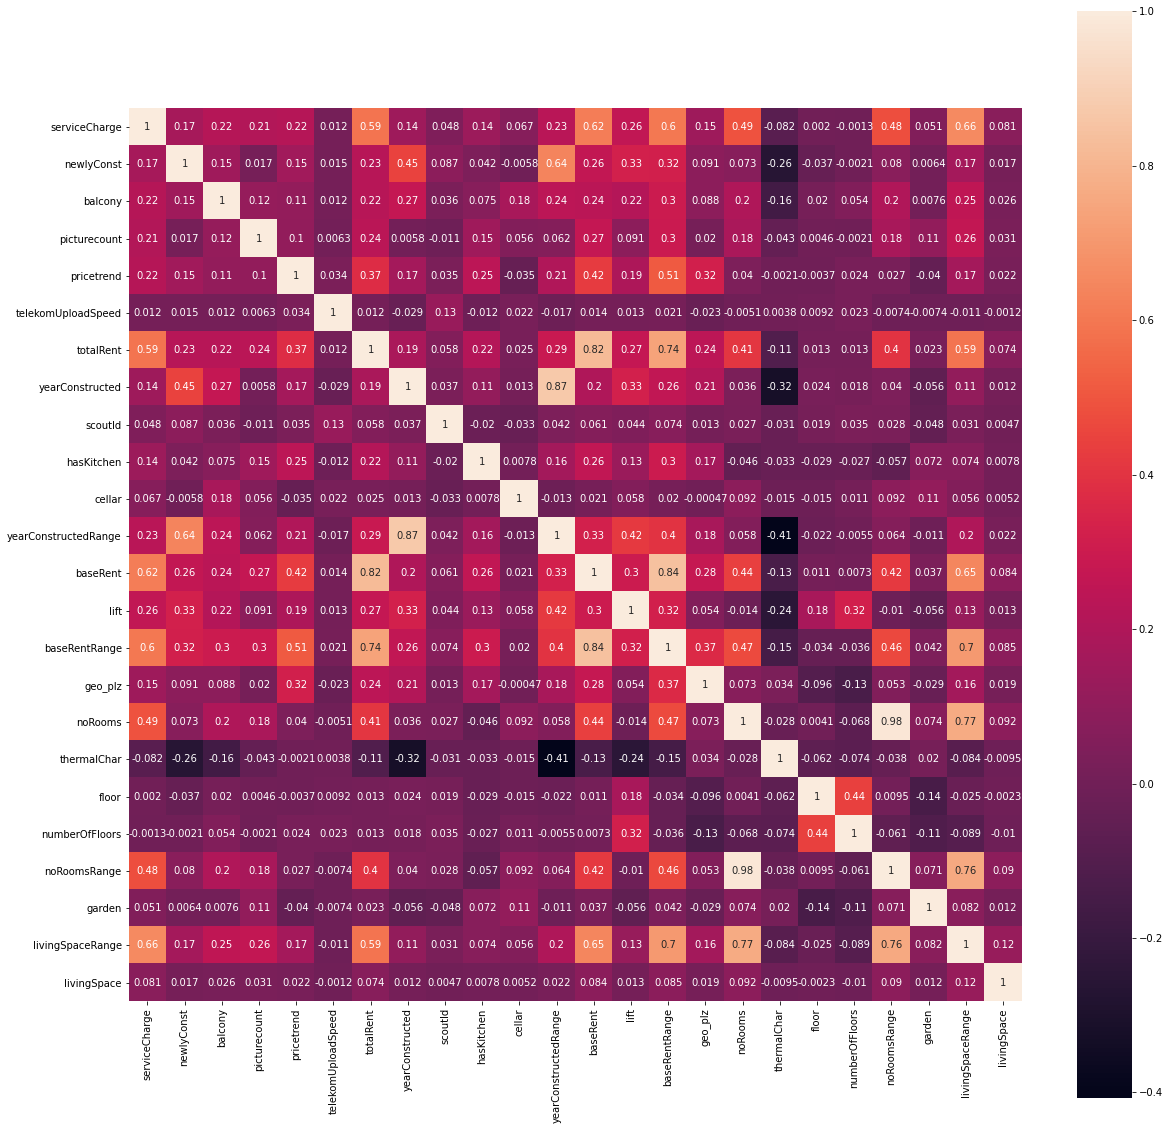

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(corr, square = True ,annot = True)

## onehot categorical data

In [ ]:
'livingSpace' in house_df_wo_location.columns

True

In [ ]:
#partioning data so we can perform scailing on data
y_wo_location = house_df_wo_location['livingSpace']
house_df_wo_location = house_df_wo_location.drop(columns=['livingSpace'])
print(house_df_wo_location.shape)
print(y_wo_location.shape)

(250476, 31)
(250476,)


In [ ]:
'livingSpace' in house_df_wo_location.columns

False

In [ ]:
categorical_subset = house_df_wo_location[categorical_cols]
categorical_subset = pd.get_dummies(categorical_subset)
categorical_subset.head()

,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,heatingType_electric_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_heat_pump,heatingType_night_storage_heater,heatingType_oil_heating,heatingType_self_contained_central_heating,heatingType_solar_heating,heatingType_stove_heating,heatingType_wood_pellet_heating,telekomTvOffer_NONE,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,firingTypes_bio_energy,firingTypes_coal,firingTypes_coal_coke,firingTypes_combined_heat_and_power_bio_energy,firingTypes_combined_heat_and_power_fossil_fuels,firingTypes_combined_heat_and_power_regenerative_energy,firingTypes_combined_heat_and_power_renewable_energy,firingTypes_district_heating,firingTypes_district_heating:bio_energy,firingTypes_district_heating:coal,firingTypes_district_heating:combined_heat_and_power_fossil_fuels,firingTypes_district_heating:combined_heat_and_power_fossil_fuels:combined_heat_and_power_regenerative_energy,firingTypes_district_heating:combined_heat_and_power_regenerative_energy,firingTypes_district_heating:combined_heat_and_power_renewable_energy,firingTypes_district_heating:electricity,firingTypes_district_heating:electricity:combined_heat_and_power_fossil_fuels,firingTypes_district_heating:electricity:local_heating,firingTypes_district_heating:electricity:local_heating:combined_heat_and_power_fossil_fuels,firingTypes_district_heating:electricity:natural_gas_heavy,firingTypes_district_heating:heat_supply,firingTypes_district_heating:hydro_energy,firingTypes_district_heating:local_heating,firingTypes_district_heating:local_heating:combined_heat_and_power_fossil_fuels,firingTypes_district_heating:local_heating:combined_heat_and_power_renewable_energy,firingTypes_district_heating:natural_gas_heavy,firingTypes_district_heating:natural_gas_light,firingTypes_district_heating:wood,firingTypes_district_heating:wood:bio_energy,firingTypes_electricity,firingTypes_electricity:bio_energy,firingTypes_electricity:coal,firingTypes_electricity:coal:natural_gas_light:natural_gas_heavy:liquid_gas:steam_district_heating:wood:wood_chips:coal_coke:local_heating:heat_supply:bio_energy:wind_energy,firingTypes_electricity:combined_heat_and_power_fossil_fuels,firingTypes_electricity:environmental_thermal_energy,firingTypes_electricity:local_heating,firingTypes_electricity:natural_gas_heavy,firingTypes_electricity:natural_gas_light,firingTypes_electricity:wood,firingTypes_electricity:wood_chips,firingTypes_environmental_thermal_energy,firingTypes_gas,firingTypes_gas:bio_energy,firingTypes_gas:combined_heat_and_power_fossil_fuels,firingTypes_gas:district_heating,firingTypes_gas:district_heating:electricity,firingTypes_gas:district_heating:local_heating,firingTypes_gas:electricity,firingTypes_gas:electricity:environmental_thermal_energy,firingTypes_gas:environmental_thermal_energy,firingTypes_gas:heat_supply,firingTypes_gas:local_heating,firingTypes_gas:natural_gas_heavy,firingTypes_gas:natural_gas_light,firingTypes_gas:natural_gas_light:heat_supply,firingTypes_gas:oil,firingTypes_gas:oil:electricity,firingTypes_gas:steam_district_heating,firingTypes_gas:wood,firingTypes_gas:wood_chips,firingTypes_geothermal,firingTypes_geothermal:bio_energy,firingTypes_geothermal:combined_heat_and_power_fossil_fuels,firingTypes_geothermal:district_heating,firingTypes_geothermal:electricity,firingTypes_geothermal:gas,firingTypes_geothermal:solar_heating,firingTypes_geothermal:solar_heating:gas,firingTypes_geothermal:solar_heating:pellet_heating,firingTypes_geothermal:solar_heating:pellet_heating:district_heating,firingTypes_geothermal:solar_heating:pellet_heating:gas,firingTypes_g

In [ ]:
categorical_subset.shape

(250476, 187)

In [ ]:
house_df_wo_location.drop(columns=categorical_cols, inplace=True)
house_df_wo_location = pd.concat([house_df_wo_location, categorical_subset], axis=1)
house_df_wo_location.shape

(250476, 210)

In [ ]:
print(y_wo_location.shape)
print(house_df_wo_location.shape)

(250476,)
(250476, 210)


In [ ]:
house_df_wo_location.head()

,serviceCharge,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,hasKitchen,cellar,yearConstructedRange,baseRent,lift,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,heatingType_electric_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_heat_pump,heatingType_night_storage_heater,heatingType_oil_heating,heatingType_self_contained_central_heating,heatingType_solar_heating,heatingType_stove_heating,heatingType_wood_pellet_heating,telekomTvOffer_NONE,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,firingTypes_bio_energy,firingTypes_coal,firingTypes_coal_coke,firingTypes_combined_heat_and_power_bio_energy,firingTypes_combined_heat_and_power_fossil_fuels,firingTypes_combined_heat_and_power_regenerative_energy,firingTypes_combined_heat_and_power_renewable_energy,firingTypes_district_heating,firingTypes_district_heating:bio_energy,firingTypes_district_heating:coal,firingTypes_district_heating:combined_heat_and_power_fossil_fuels,firingTypes_district_heating:combined_heat_and_power_fossil_fuels:combined_heat_and_power_regenerative_energy,firingTypes_district_heating:combined_heat_and_power_regenerative_energy,firingTypes_district_heating:combined_heat_and_power_renewable_energy,firingTypes_district_heating:electricity,firingTypes_district_heating:electricity:combined_heat_and_power_fossil_fuels,firingTypes_district_heating:electricity:local_heating,firingTypes_district_heating:electricity:local_heating:combined_heat_and_power_fossil_fuels,firingTypes_district_heating:electricity:natural_gas_heavy,firingTypes_district_heating:heat_supply,firingTypes_district_heating:hydro_energy,firingTypes_district_heating:local_heating,firingTypes_district_heating:local_heating:combined_heat_and_power_fossil_fuels,firingTypes_district_heating:local_heating:combined_heat_and_power_renewable_energy,firingTypes_district_heating:natural_gas_heavy,firingTypes_district_heating:natural_gas_light,firingTypes_district_heating:wood,firingTypes_district_heating:wood:bio_energy,firingTypes_electricity,firingTypes_electricity:bio_energy,firingTypes_electricity:coal,firingTypes_electricity:coal:natural_gas_light:natural_gas_heavy:liquid_gas:steam_district_heating:wood:wood_chips:coal_coke:local_heating:heat_supply:bio_energy:wind_energy,firingTypes_electricity:combined_heat_and_power_fossil_fuels,firingTypes_electricity:environmental_thermal_energy,firingTypes_electricity:local_heating,firingTypes_electricity:natural_gas_heavy,firingTypes_electricity:natural_gas_light,firingTypes_electricity:wood,firingTypes_electricity:wood_chips,firingTypes_environmental_thermal_energy,firingTypes_gas,firingTypes_gas:bio_energy,firingTypes_gas:combined_heat_and_power_fossil_fuels,firingTypes_gas:district_heating,firingTypes_gas:district_heating:electricity,firingTypes_gas:district_heating:local_heating,firingTypes_gas:electricity,firingTypes_gas:electricity:environmental_thermal_energy,firingTypes_gas:environmental_thermal_energy,firingTypes_gas:heat_supply,firingTypes_gas:local_heating,firingTypes_gas:natural_gas_heavy,firingTypes_gas:natural_gas_light,firingTypes_gas:natural_gas_light:heat_supply,firingTypes_gas:oil,firingTypes_gas:oil:electricity,firingTypes_gas:steam_district_heating,firingTypes_gas:wood,firingTypes_gas:wood_chips,firingTypes_geothermal,firingTypes_geothermal:bio_energy,firingTypes_geothermal:combined_heat_and_power_fossil_fuels,firingTypes_geothermal:district_heating,firingTypes_geothermal:electricity,firingTypes_geothermal:gas,firin

In [ ]:
house_df_wo_location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250476 entries, 0 to 268849
Columns: 210 entries, serviceCharge to typeOfFlat_terraced_flat
dtypes: bool(6), float64(17), uint8(187)
memory usage: 90.5 MB


In [ ]:
print(house_df_wo_location.shape)
print(y_wo_location.shape)

(250476, 210)
(250476,)


In [ ]:
from google.colab import files

y_wo_location.to_csv('clean_data_y.csv')
files.download('clean_data_y.csv')

house_df_wo_location.to_csv('clean_data_x.csv')
files.download('clean_data_x.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.90)
x_pca = pca.fit_transform(house_df_wo_location)
x_pca.shape

(250476, 28)

In [ ]:
x_pca

array([[ 0.48733675,  1.67897312, -0.86895265, ...,  0.22779749,
         0.48941335,  0.34394646],
       [ 0.12404757,  1.77930631, -1.70584716, ..., -0.55603902,
         0.33294011,  0.54131494],
       [ 1.96097155, -0.93185771,  2.55234523, ...,  0.12586764,
        -0.07524461,  0.32759064],
       ...,
       [ 2.40798118,  0.25152804, -1.29125782, ...,  0.12456233,
        -0.06244427,  0.06489257],
       [ 2.43429189, -2.55330779,  0.85939294, ..., -0.12404633,
        -0.12279651,  0.35595074],
       [ 1.19346932, -0.03266851, -0.89359927, ...,  0.17605547,
         0.07547037, -0.09233619]])

In [ ]:
y_wo_location.shape

(250476,)

## Train Test split

In [ ]:
train_size = int(0.8 * house_df_wo_location.shape[0])
train_size

200380

In [ ]:
x_train = house_df_wo_location[:train_size]
y_train = y_wo_location[:train_size]

print(x_train.shape)
print(y_train.shape)

x_test = house_df_wo_location[train_size:]
y_test = y_wo_location[train_size:]

print(x_test.shape)
print(y_test.shape)

(200380, 210)
(200380,)
(50096, 210)
(50096,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(50096, 210)
(50096,)


In [ ]:
x_test.shape[1]

210

In [ ]:
'livingSpace' in x_test.columns

False

## Train Test split PCA

In [ ]:
train_size = int(0.8 * x_pca.shape[0])
train_size

200380

In [ ]:
x_pca_train = x_pca[:train_size]
print(x_pca_train.shape)
x_pca_test = x_pca[train_size:]
print(x_pca_test.shape)

(200380, 28)
(50096, 28)


## linear regression with most correlated column(living space range)

In [ ]:
# initializing our inputs and outputs
X = x_train['livingSpaceRange'].values
Y = y_train.values
# mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)
#total number of values
n = len(X)
# using the formula to calculate the b1 and b0
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)
#printing the coefficient
print(b1, b0)

32.8702789596806 74.4196739327577


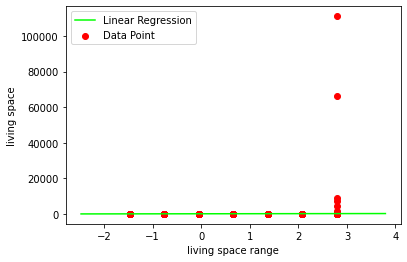

In [ ]:
#plotting values 
x_max = np.max(X) + 1
x_min = np.min(X) - 1
#calculating line values of x and y
x = np.linspace(x_min, x_max)
y = b0 + b1 * x
#plotting line 
plt.plot(x, y, color='#00ff00', label='Linear Regression')
#plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')
# x-axis label
plt.xlabel('living space range')
#y-axis label
plt.ylabel('living space')
plt.legend()
plt.show()

In [ ]:
test_error = y_test - ((b1 * x_test['livingSpaceRange']) + b0)
test_mse = (test_error**2).mean()
test_mse

2374.027647218314

## linear regression using PCA data from scratch

In [ ]:
# Initializes parameters "w" and "b" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(x_pca_train.shape[1])
n = x_pca_train.shape[0]

# Sets learning rate
lr = 0.01

# Defines number of epochs
n_epochs = 500

test_error =  y_test - np.sum((w * x_pca_test) + b , axis = 1)
test_mse = (test_error**2).mean()           
print('init MSE : ',test_mse)
              
for epoch in range(n_epochs):
    error = y_train - np.sum((w * x_pca_train) + b , axis = 1)
    
    if epoch % 100 == 0:    
        print('epoch {} , MSE : {}'.format(epoch,(error**2).mean()))
    
    w_grad = [0] * x_pca_train.shape[1]
    b_grad = 0
    
    for i in range(x_pca_train.shape[1]):
        w_grad[i] = -1 * (x_pca_train[:,i] * error).mean()
        w[i] = w[i] - (lr * w_grad[i])
        
    b_grad = -1 * error.mean()
    b = b - (lr*b_grad)
              

test_error = y_test - np.sum((w * x_pca_test) + b , axis = 1)
test_mse = (test_error**2).mean() 
print('Final MSE : ',test_mse)

init MSE :  6861.488494102144
epoch 0 , MSE : 88573.27005735633
epoch 100 , MSE : 84039.66514779816
epoch 200 , MSE : 83990.58820197257
epoch 300 , MSE : 83964.94396669499
epoch 400 , MSE : 83947.9080718902
Final MSE :  2376.486758884171


In [ ]:
y_pred = np.sum((w * x_pca_test) + b , axis = 1)
temp = pd.DataFrame({'test':y_test,'pred':y_pred})
temp.head()

,test,pred
215173,108.00,122.208036
215174,52.80,52.366281
215175,58.00,50.925901
215176,83.05,96.743490
215177,105.00,111.792276


In [ ]:
y_train

0          86.00
1          89.00
2          83.80
3          58.15
4          84.97
           ...  
215168    228.00
215169    125.45
215170     74.16
215171    128.00
215172     76.00
Name: livingSpace, Length: 200380, dtype: float64

In [ ]:
scratch_linear_mse = test_mse
scratch_linear_mse

2376.486758884171

## linear regression using sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
Linear = LinearRegression()
Linear.fit(x_pca_train,y_train)
print(Linear.coef_)
print(Linear.intercept_)

[ 13.77406124  12.9255733    2.82353271   0.66612581  -3.13399118
  -2.04131448   0.90661033  -0.98322615  -3.1408961   -4.97651863
  -4.26401543  -8.6792627    2.96649395   1.02704963  -1.35478749
   2.13788011   8.32354067   4.09816163   5.16494415  -5.64141037
 -23.66541383  -1.48081128  -8.50981885  -5.74859136   4.27908774
  -2.2232652   -0.57035349   0.66345206]
74.0847411119338


In [ ]:
y_pca_pred = Linear.predict(x_pca_test)

In [ ]:
mean_squared_error(y_pca_pred,y_test)

2386.0118124073633

In [ ]:
temp = pd.DataFrame({'test':y_test,'pred':y_pca_pred})
temp.head(25)

,test,pred
215173,108.00,112.506597
215174,52.80,49.570590
215175,58.00,54.559974
215176,83.05,102.287262
215177,105.00,120.952426
215178,49.12,48.166393
215179,140.00,140.616672
215180,94.86,90.125011
215181,72.00,73.560876
215184,59.66,50.963724


In [ ]:
temp['upper_range'] = temp['test'] * 1.15
temp['lower_range'] = temp['test'] * 0.85

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

70.6244011497924

In [ ]:
sklearn_linear_mse = mean_squared_error(y_pca_pred,y_test)
sklearn_linear_mse

2386.0118124073633

## Comparing two models based on mse

In [ ]:
sklearn_linear_mse > scratch_linear_mse

True

sklearn model works better by slighter margin
the amount of difference is shown below

In [ ]:
abs(sklearn_linear_mse - scratch_linear_mse)

9.525053523192128